## Cross-Shelf Transport - Canyon effects

This notebook explores the effects of changing the diapycnal diffusivity on the cross-shelf transport of tracers .

In [2]:
#import gsw as sw # Gibbs seawater package

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

#from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

In [15]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import MetricsPythonTools as mpt


In [99]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')

In [13]:
#Exp
#CGrid = '/Users/Karina/Research/PhD/Tracers/TemporaryData/BARKLEY/run01/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
CGridOut = Dataset(CGrid)

CGridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
CGridNoCOut = Dataset(CGridNoC)


In [6]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 13 # number of tracers in total (CNT =9, 3D = 4, total = 13)

rc = CGridOut.variables['RC']

xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

drF = CGridOut.variables['drF'] # vertical distance between faces
drC = CGridOut.variables['drC'] # vertical distance between centers

labels = ['Kv=1E-5','Kv=1E-4','Kv=1E-3','Kv_in=1E-7, Kv_out=1E-3','Kv_in=1E-7, Kv_out=1E-4','Kv_in=1E-5, Kv_out=1E-3',
          'Kv_in=1E-5, Kv_out=1E-4','Kv=3.8E-5','Kv=2.8E-5','Kv=1.3E-5','Kv_noc=1E-5','Kv_noc=1E-4','Kv_noc=1E-3']

times = np.arange(0,nt,1)

#print(drC[:])
#print(np.shape(drC))

In [7]:
def get_metrics(exp, run, TrNum, key):
    '''Get column from a tracer metrics pandas dataframe using the key name, run (01, 02, etc) and experiment 
    abreviated name (BAR, CNTDIFF, 3DDIFF, NOGMREDI). All input variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(('results/metricsDataFrames/%srun%sTr%s.csv' %(exp,run,TrNum)))
    col = df[key]
    return col


In [8]:
# Just to know what's in there...
df = pd.read_csv('results/metricsDataFrames/CNTDIFF_CSTRANS_run03Tr2.csv')
df.head(1)

,Unnamed: 0,day,CS1,CS2,CS3,CS3sb,CS4,CS5,AS1,AS2,LID1,LID2
0,0,0.5,-0.255313,-0.684843,6.053521,0.585201,-4.643782,-0.226209,31.498585,37.769226,0.10978,0.540488


In [97]:
# load initial profiles

tracers_3D = ['04','05','06','07'] #run number because there's only 1 tr per run
tracers_CNT03 = ['1','2','3'] # tracer number , constant runs
tracers_CNT09 = ['1','2','3'] # tracer number , average diffusivity runs
tracers_CNT07 = ['1','2','3'] # tracer number , no canyon case

CS1 = np.zeros((nt-1,numTr)) 
CS2 = np.zeros((nt-1,numTr)) 
CS3 = np.zeros((nt-1,numTr)) 
CS4 = np.zeros((nt-1,numTr)) 
CS5 = np.zeros((nt-1,numTr)) 
CS3sb = np.zeros((nt-1,numTr)) 
AS1 = np.zeros((nt-1,numTr)) 
AS2 = np.zeros((nt-1,numTr)) 
LID1 = np.zeros((nt-1,numTr)) 
LID2 = np.zeros((nt-1,numTr)) 

kk = 0

fields = ['CS1','CS2','CS3','CS3sb','CS4','CS5','AS1' ,'AS2','LID1' ,'LID2']

for ii in tracers_3D:
    
    CS1[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[0] )
    CS2[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[1] )
    CS3[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[2] )
    CS3sb[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[3] )
    CS4[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[4] )
    CS5[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[5] )
    AS1[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[6] )
    AS2[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[7] )
    LID1[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[8] )
    LID2[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[9] )
      
    kk=kk+1

for ii in tracers_CNT03:
    
    CS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[0] )
    CS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[1] )
    CS3[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[2] )
    CS3sb[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[3] )
    CS4[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[4] )
    CS5[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[5] )
    AS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[6] )
    AS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[7] )
    LID1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[8] )
    LID2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[9] )
      
    kk=kk+1

for ii in tracers_CNT09:
    
    CS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[0] )
    CS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[1] )
    CS3[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[2] )
    CS3sb[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[3] )
    CS4[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[4] )
    CS5[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[5] )
    AS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[6] )
    AS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[7] )
    LID1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[8] )
    LID2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[9] )
      
    kk=kk+1

for ii in tracers_CNT07:
    
    CS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[0] )
    CS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[1] )
    CS3[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[2] )
    CS3sb[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[3] )
    CS4[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[4] )
    CS5[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[5] )
    AS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[6] )
    AS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[7] )
    LID1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[8] )
    LID2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[9] )
      
    kk=kk+1

print(kk)

13


## Definition of sections 

Different sections are defined to cover the whole shelf, and transports are sliced across them. There is  ane xtra section, not shown below, parallel to CS3 but leveled with the shelf break if the shelf was flat (yc[227,x]). It is named CS3sb.

<img src="figs/CrossShelfPlanes.png">

### Canyon and no canyon exploration of transport

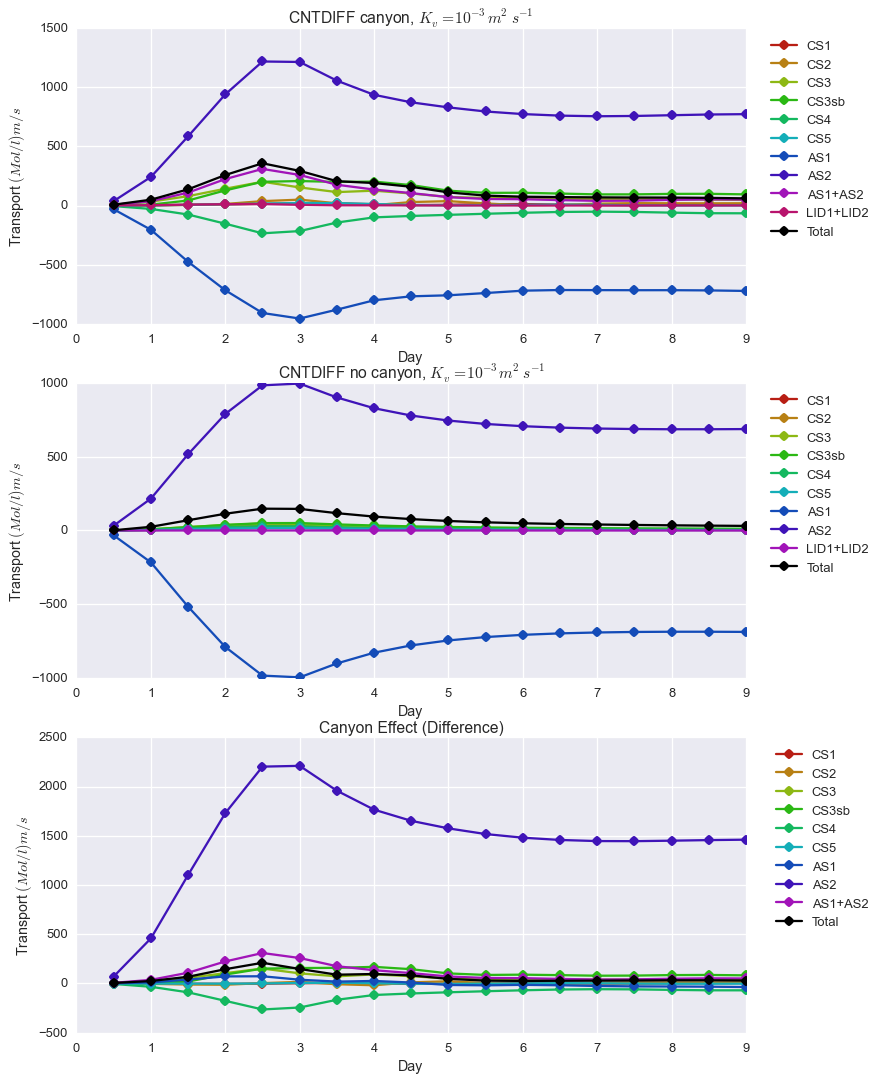

In [105]:
sns.set_palette( sns.hls_palette(10, l=.4, s=.8)) 

fig45=plt.figure(figsize=(12,18))

total1 = LID1[:,6] + LID2[:,6] - AS1[:,6] + AS2[:,6] + CS1[:,6] + CS2[:,6] + CS3[:,6] + CS4[:,6] + CS5[:,6]
ax1 = plt.subplot(3,1,1)
ax1.plot(times[1:]/2.0, CS1[:,6],'o-', label = fields[0])
ax1.plot(times[1:]/2.0, CS2[:,6],'o-', label = fields[1])
ax1.plot(times[1:]/2.0, CS3[:,6],'o-', label = fields[2])
ax1.plot(times[1:]/2.0, CS3sb[:,6],'o-', label = fields[3])
ax1.plot(times[1:]/2.0, CS4[:,6],'o-', label = fields[4])
ax1.plot(times[1:]/2.0, CS5[:,6],'o-', label = fields[5])
ax1.plot(times[1:]/2.0, -AS1[:,6],'o-', label = fields[6])
ax1.plot(times[1:]/2.0, AS2[:,6],'o-', label = fields[7])
ax1.plot(times[1:]/2.0, -AS1[:,6]+AS2[:,6],'o-', label = 'AS1+AS2')
#ax1.plot(times[1:]/2.0, LID1[:,6],'o-', label = fields[8])
#ax1.plot(times[1:]/2.0, LID2[:,6],'o-', label = fields[9])
ax1.plot(times[1:]/2.0, LID1[:,6]+LID2[:,6],'o-', label = 'LID1+LID2')

ax1.plot(times[1:]/2.0, total1 ,'ko-', label = 'Total')

plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))
plt.ylabel('Transport $(Mol/l) m/s$ ')
plt.xlabel('Day')
plt.title('CNTDIFF canyon, $K_v = 10^{-3}m^2s^{-1}$')


total2 = LID1[:,12]+LID2[:,12]- AS1[:,12] + AS2[:,12]+CS1[:,12] + CS2[:,12] + CS3sb[:,12] + CS4[:,12] + CS5[:,12]# 
ax1 = plt.subplot(3,1,2)
ax1.plot(times[1:]/2.0, CS1[:,12],'o-', label = fields[0])
ax1.plot(times[1:]/2.0, CS2[:,12],'o-', label = fields[1])
ax1.plot(times[1:]/2.0, CS3[:,12],'o-', label = fields[2])
ax1.plot(times[1:]/2.0, CS3sb[:,12],'o-', label = fields[3])
ax1.plot(times[1:]/2.0, CS4[:,12],'o-', label = fields[4])
ax1.plot(times[1:]/2.0, CS5[:,12],'o-', label = fields[5])
ax1.plot(times[1:]/2.0, -AS1[:,12],'o-', label = fields[6])
ax1.plot(times[1:]/2.0, AS2[:,12],'o-', label = fields[7])
#ax1.plot(times[1:]/2.0, -AS1[:,12]+AS2[:,12],'o-', label = 'AS1+AS2')
#ax1.plot(times[1:]/2.0, LID1[:,12],'o-', label = fields[8])
#ax1.plot(times[1:]/2.0, LID2[:,12],'o-', label = fields[9])
ax1.plot(times[1:]/2.0, LID1[:,12]+LID2[:,12],'o-', label = 'LID1+LID2')

ax1.plot(times[1:]/2.0, total2 ,'ko-', label = 'Total')

plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))
plt.ylabel('Transport $(Mol/l) m/s$ ')
plt.xlabel('Day')
plt.title('CNTDIFF no canyon, $K_v = 10^{-3}m^2s^{-1}$')

ax1 = plt.subplot(3,1,3)
ax1.plot(times[1:]/2.0, CS1[:,6]-CS1[:,12],'o-', label = fields[0])
ax1.plot(times[1:]/2.0, CS2[:,6]-CS2[:,12],'o-', label = fields[1])
ax1.plot(times[1:]/2.0, CS3[:,6]-CS3sb[:,12],'o-', label = fields[2])
ax1.plot(times[1:]/2.0, CS3sb[:,6]-CS3sb[:,12],'o-', label = fields[3])
ax1.plot(times[1:]/2.0, CS4[:,6]-CS4[:,12],'o-', label = fields[4])
ax1.plot(times[1:]/2.0, CS5[:,6]-CS5[:,12],'o-', label = fields[5])
ax1.plot(times[1:]/2.0, -AS1[:,6]-(-AS1[:,12]),'o-', label = fields[6])
ax1.plot(times[1:]/2.0, AS2[:,6]-(-AS2[:,12]),'o-', label = fields[7])
ax1.plot(times[1:]/2.0, (-AS1[:,6]+AS2[:,6])-(-AS1[:,12]+AS2[:,12]),'o-', label = 'AS1+AS2')
#ax1.plot(times[1:]/2.0, LID1[:,6]-LID1[:,12],'o-', label = fields[8])
#ax1.plot(times[1:]/2.0, LID2[:,6]-LID2[:,12],'o-', label = fields[9])
#ax1.plot(times[1:]/2.0, (LID1[:,6]+LID2[:,6])-(LID1[:,12]+LID2[:,12]),'o-', label = 'LID1+LID2')

ax1.plot(times[1:]/2.0, total1-total2 ,'ko-', label = 'Total')
#plt.ylim(1,4.1)
plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))
plt.ylabel('Transport $(Mol/l) m/s$ ')
plt.xlabel('Day')
plt.title('Canyon Effect (Difference)')

#fig45.savefig('results/figures/CStransport/CSTransportALLplanesCNT_Tr3_difference.eps', format='eps', dpi=1000, bbox_inches='tight')


### Relative magnitude of each trasnsect's transport w.r.t. no canyon case.

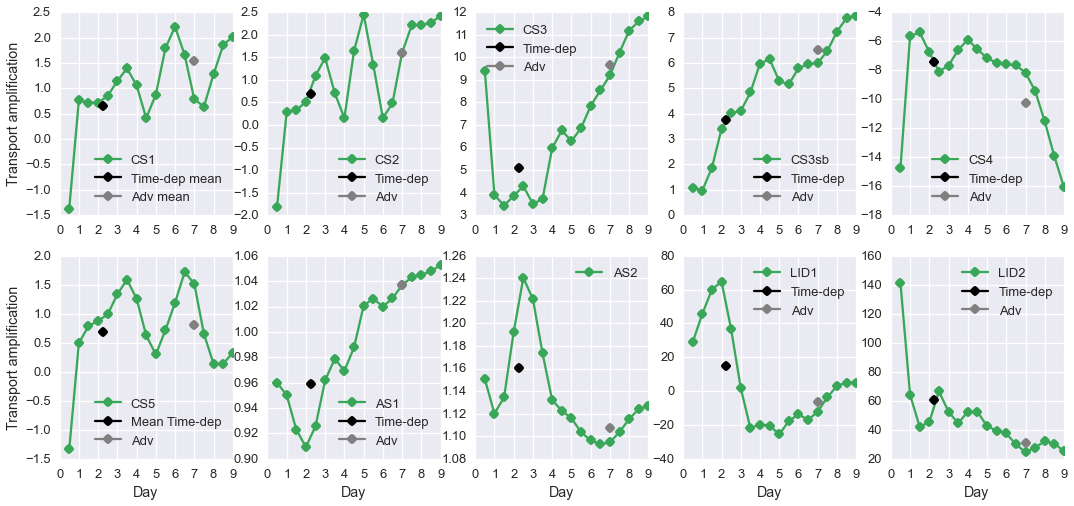

In [104]:
sns.set_palette('RdYlGn_r') 

means = np.zeros((4,len(fields)))

fig45=plt.figure(figsize=(18,8))
plt.title('CNTDIFF, $K_v=10^{-5}$, Canyon amplification of CS transport')

ax1 = plt.subplot(2,5,1)
ax1.plot(times[1:]/2.0, CS1[:,6]/CS1[:,12],'o-', label = fields[0])
ax1.plot(np.mean(times[:10]/2.0),np.mean(CS1[:10,6]/CS1[:10,12]),'ko-',label='Time-dep mean')
ax1.plot(np.mean(times[10:]/2.0),np.mean(CS1[10:,6]/CS1[10:,12]),'o-',color = 'gray',label='Adv mean')
ax1.legend(loc=0)
plt.ylabel('Transport amplification ')
means[0,0] = np.mean(CS1[:10,6]/CS1[:10,12])
means[2,0] = np.std(CS1[:10,6]/CS1[:10,12])
means[1,0] = np.mean(CS1[10:,6]/CS1[10:,12])
means[3,0] = np.std(CS1[10:,6]/CS1[10:,12])


ax2 = plt.subplot(2,5,2)
ax2.plot(times[1:]/2.0, CS2[:,6]/CS2[:,12],'o-', label = fields[1])
ax2.plot(np.mean(times[:10]/2.0),np.mean(CS2[:10,6]/CS2[:10,12]),'ko-',label='Time-dep')
ax2.plot(np.mean(times[10:]/2.0),np.mean(CS2[10:,6]/CS2[10:,12]),'o-',color = 'gray',label='Adv')
ax2.legend(loc=0)
means[0,1] = np.mean(CS2[:10,6]/CS2[:10,12])
means[1,1] = np.mean(CS2[10:,6]/CS2[10:,12])
means[2,1] = np.std(CS2[:10,6]/CS2[:10,12])
means[3,1] = np.std(CS2[10:,6]/CS2[10:,12])


ax3 = plt.subplot(2,5,3)
ax3.plot(times[1:]/2.0, CS3[:,6]/CS3[:,12],'o-', label = fields[2])
ax3.plot(np.mean(times[:10]/2.0),np.mean(CS3[:10,6]/CS3[:10,12]),'ko-',label='Time-dep')
ax3.plot(np.mean(times[10:]/2.0),np.mean(CS3[10:,6]/CS3[10:,12]),'o-',color = 'gray',label='Adv')
ax3.legend(loc=0)
means[0,2] = np.mean(CS3[:10,6]/CS3[:10,12])
means[1,2] = np.mean(CS3[10:,6]/CS3[10:,12])
means[2,2] = np.std(CS3[:10,6]/CS3[:10,12])
means[3,2] = np.std(CS3[10:,6]/CS3[10:,12])

ax4 = plt.subplot(2,5,4)
ax4.plot(times[1:]/2.0, CS3sb[:,6]/CS3sb[:,12],'o-', label = fields[3])
ax4.plot(np.mean(times[:10]/2.0),np.mean(CS3sb[:10,6]/CS3sb[:10,12]),'ko-',label='Time-dep')
ax4.plot(np.mean(times[10:]/2.0),np.mean(CS3sb[10:,6]/CS3sb[10:,12]),'o-',color = 'gray',label='Adv')
ax4.legend(loc=0)
means[0,3] = np.mean(CS3sb[:10,6]/CS3sb[:10,12])
means[1,3] = np.mean(CS3sb[10:,6]/CS3sb[10:,12])
means[2,3] = np.std(CS3sb[:10,6]/CS3sb[:10,12])
means[3,3] = np.std(CS3sb[10:,6]/CS3sb[10:,12])

ax5 = plt.subplot(2,5,5)
ax5.plot(times[1:]/2.0, CS4[:,6]/CS4[:,12],'o-', label = fields[4])
ax5.plot(np.mean(times[:10]/2.0),np.mean(CS4[:10,6]/CS4[:10,12]),'ko-',label='Time-dep')
ax5.plot(np.mean(times[10:]/2.0),np.mean(CS4[10:,6]/CS4[10:,12]),'o-',color = 'gray',label='Adv')
ax5.legend(loc=0)
means[0,4] = np.mean(CS4[:10,6]/CS4[:10,12])
means[1,4] = np.mean(CS4[10:,6]/CS4[10:,12])
means[2,4] = np.std(CS4[:10,6]/CS4[:10,12])
means[3,4] = np.std(CS4[10:,6]/CS4[10:,12])

ax6 = plt.subplot(2,5,6)
ax6.plot(times[1:]/2.0, CS5[:,6]/CS5[:,12],'o-', label = fields[5])
ax6.plot(np.mean(times[:10]/2.0),np.mean(CS5[:10,6]/CS5[:10,12]),'ko-',label='Mean Time-dep')
ax6.plot(np.mean(times[10:]/2.0),np.mean(CS5[10:,6]/CS5[10:,12]),'o-',color = 'gray',label='Adv')
ax6.legend(loc=0)
plt.ylabel('Transport amplification ')
plt.xlabel('Day')
means[0,5] = np.mean(CS5[:10,6]/CS5[:10,12])
means[1,5] = np.mean(CS5[10:,6]/CS5[10:,12])
means[2,5] = np.std(CS5[:10,6]/CS5[:10,12])
means[3,5] = np.std(CS5[10:,6]/CS5[10:,12])

ax7 = plt.subplot(2,5,7)
ax7.plot(times[1:]/2.0, AS1[:,6]/AS1[:,12],'o-', label = fields[6])
ax7.plot(np.mean(times[:10]/2.0),np.mean(AS1[:10,6]/AS1[:10,12]),'ko-',label='Time-dep')
ax7.plot(np.mean(times[10:]/2.0),np.mean(AS1[10:,6]/AS1[10:,12]),'o-',color = 'gray',label='Adv')
ax7.legend(loc=0)
plt.xlabel('Day')
means[0,6] = np.mean(AS1[:10,6]/AS1[:10,12])
means[1,6] = np.mean(AS1[10:,6]/AS1[10:,12])
means[2,6] = np.std(AS1[:10,6]/AS1[:10,12])
means[3,6] = np.std(AS1[10:,6]/AS1[10:,12])

ax8 = plt.subplot(2,5,8)
ax8.plot(times[1:]/2.0, AS2[:,6]/AS2[:,12],'o-', label = fields[7])
ax8.legend(loc=0)
ax8.plot(np.mean(times[:10]/2.0),np.mean(AS2[:10,6]/AS2[:10,12]),'ko-',label='Time-dep')
ax8.plot(np.mean(times[10:]/2.0),np.mean(AS2[10:,6]/AS2[10:,12]),'o-',color = 'gray',label='Adv')
plt.xlabel('Day')
means[0,7] = np.mean(AS2[:10,6]/AS2[:10,12])
means[1,7] = np.mean(AS2[10:,6]/AS2[10:,12])
means[2,7] = np.std(AS2[:10,6]/AS2[:10,12])
means[3,7] = np.std(AS2[10:,6]/AS2[10:,12])

ax9 = plt.subplot(2,5,9)
ax9.plot(times[1:]/2.0, LID1[:,6]/LID1[:,12],'o-', label = fields[8])
ax9.plot(np.mean(times[:10]/2.0),np.mean(LID1[:10,6]/LID1[:10,12]),'ko-',label='Time-dep')
ax9.plot(np.mean(times[10:]/2.0),np.mean(LID1[10:,6]/LID1[10:,12]),'o-',color = 'gray',label='Adv')
ax9.legend(loc=0)
plt.xlabel('Day')
means[0,8] = np.mean(LID1[:10,6]/LID1[:10,12])
means[1,8] = np.mean(LID1[10:,6]/LID1[10:,12])
means[2,8] = np.std(LID1[:10,6]/LID1[:10,12])
means[3,8] = np.std(LID1[10:,6]/LID1[10:,12])

ax10 = plt.subplot(2,5,10)
ax10.plot(times[1:]/2.0, LID2[:,6]/LID2[:,12],'o-', label = fields[9])
ax10.plot(np.mean(times[:10]/2.0),np.mean(LID2[:10,6]/LID2[:10,12]),'ko-',label='Time-dep')
ax10.plot(np.mean(times[10:]/2.0),np.mean(LID2[10:,6]/LID2[10:,12]),'o-',color = 'gray',label='Adv')
ax10.legend(loc=0)
plt.xlabel('Day')
means[0,9] = np.mean(LID2[:10,6]/LID2[:10,12])
means[1,9] = np.mean(LID2[10:,6]/LID2[10:,12])
means[2,9] = np.std(LID2[:10,6]/LID2[:10,12])
means[3,9] = np.std(LID2[10:,6]/LID2[10:,12])



#fig45.savefig('results/figures/CStransport/CSTransportALLplanesCNT_Tr3_ratios.eps', format='eps', dpi=1000, bbox_inches='tight')


In [106]:
# Data frame mean transport difference

meanTransEffect = {'transect': fields, 'time_dep_mean': means[0,:], 'adv_mean': means[1,:],'time_dep_std':means[2,:],'adv_std': means[3,:]}
df = pd.DataFrame(meanTransEffect, columns = ['transect', 'time_dep_mean', 'adv_mean','time_dep_std','adv_std'])
df

,transect,time_dep_mean,adv_mean,time_dep_std,adv_std
0,CS1,0.657580,1.530568,0.722412,0.537722
1,CS2,0.685080,1.587754,1.079245,0.811802
2,CS3,5.111240,9.657506,1.852263,1.719302
3,CS3sb,3.770788,6.532657,1.816472,0.925478
4,CS4,-7.449828,-10.233269,2.567404,3.080136
5,CS5,0.691670,0.800332,0.774469,0.574841
6,AS1,0.958620,1.037253,0.031787,0.011087
7,AS2,1.160330,1.107073,0.042371,0.012430
8,LID1,14.976052,-6.417894,34.267719,9.256758
9,LID2,60.321963,30.812601,28.098188,5.013218


## Transport "pathways"

In [116]:

FluxTR01 = ('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR01Glob.nc' )
FluxTR01NoC = ('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/FluxTR01Glob.nc' )
  
rc = CGridOut.variables['RC']
xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

drF = CGridOut.variables['drF'] # vertical distance between faces
#dxG = rout.getField(CGrid,'dxG')

MaskCan = rout.getMask(CGrid,'HFacC') 
hFacCCan = rout.getField(CGrid,'HFacC') 
#rACan = rout.getField(CGrid,'rA') 
#drFCan=CGridOut.variables['drF']

MaskNoC = rout.getMask(CGridNoC,'HFacC') 
hFacCNoC = rout.getField(CGridNoC,'HFacC') 
#rACan = rout.getField(CGrid,'rA') 
#drFCan=CGridOut.variables['drF']

#Transect definitions (indices x,y,z,t)
  
CS1 = [0,40,227,227,0,29,0,18]
CS2 = [40,120,227,227,0,29,0,18]
CS3 = [120,240,267,267,0,29,0,18]
CS3sb = [120,240,227,227,0,29,0,18]
CS4 = [240,320,227,227,0,29,0,18]
CS5 = [320,359,227,227,0,29,0,18]
AS1 = [120,120,227,267,0,29,0,18]
AS2 = [240,240,227,267,0,29,0,18]
LID1 = [120,180,227,267,29,29,0,18]
LID2 = [180,240,227,267,29,29,0,18]
  
day = [0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5., 5.5,  6., 6.5,  7., 7.5,  8., 8.5,  9.] # Fluxes are calculated between two outputs

TracerList = ['Tr1']  
fluxfile = [FluxTR01]
fluxtr = ['1']
  
for f,tr,trstr in zip (fluxfile,fluxtr,TracerList):
    
    keyw = ('WTRAC0%s' %tr)
    keyv = ('VTRAC0%s' %tr)
    keyu = ('UTRAC0%s' %tr)
    
    Wnm,Vnm,Unm = mpt.get_TRAC(f, keyw ,keyv, keyu)
    
    MaskExp = mpt.maskExpand(MaskCan,Unm)
    U = np.ma.MaskedArray(Unm,mask=MaskExp)
    V = np.ma.MaskedArray(Vnm,mask=MaskExp)
    W = np.ma.MaskedArray(Wnm,mask=MaskExp)


    #Get slices
    V_CS1a = mpt.slice_TRAC(V,CS1[0],CS1[1],CS1[2],CS1[3],CS1[4],CS1[5],CS1[6],CS1[7])
    V_CS2a = mpt.slice_TRAC(V,CS2[0],CS2[1],CS2[2],CS2[3],CS2[4],CS2[5],CS2[6],CS2[7])
    V_CS3a = mpt.slice_TRAC(V,CS3[0],CS3[1],CS3[2],CS3[3],CS3[4],CS3[5],CS3[6],CS3[7])
    V_CS4a = mpt.slice_TRAC(V,CS4[0],CS4[1],CS4[2],CS4[3],CS4[4],CS4[5],CS4[6],CS4[7])
    V_CS5a = mpt.slice_TRAC(V,CS5[0],CS5[1],CS5[2],CS5[3],CS5[4],CS5[5],CS5[6],CS5[7])
    V_CS3sba = mpt.slice_TRAC(V,CS3sb[0],CS3sb[1],CS3sb[2],CS3sb[3],CS3sb[4],CS3sb[5],CS3sb[6],CS3sb[7])
    U_AS1a = mpt.slice_TRAC(U,AS1[0],AS1[1],AS1[2],AS1[3],AS1[4],AS1[5],AS1[6],AS1[7])
    U_AS2a = mpt.slice_TRAC(U,AS2[0],AS2[1],AS2[2],AS2[3],AS2[4],AS2[5],AS2[6],AS2[7])
    W_LID1a = mpt.slice_TRAC(W,LID1[0],LID1[1],LID1[2],LID1[3],LID1[4],LID1[5],LID1[6],LID1[7])
    W_LID2a = mpt.slice_TRAC(W,LID2[0],LID2[1],LID2[2],LID2[3],LID2[4],LID2[5],LID2[6],LID2[7])

    

fluxfileNoC = [FluxTR01NoC]


for f,tr,trstr in zip (fluxfileNoC,fluxtr,TracerList):
    
    keyw = ('WTRAC0%s' %tr)
    keyv = ('VTRAC0%s' %tr)
    keyu = ('UTRAC0%s' %tr)
    
    Wnm,Vnm,Unm = mpt.get_TRAC(f, keyw ,keyv, keyu)
    
    MaskExpNoC = mpt.maskExpand(MaskNoC,Unm)
    U = np.ma.MaskedArray(Unm,mask=MaskExpNoC)
    V = np.ma.MaskedArray(Vnm,mask=MaskExpNoC)
    W = np.ma.MaskedArray(Wnm,mask=MaskExpNoC)

    #Get slices
    V_CS1b = mpt.slice_TRAC(V,CS1[0],CS1[1],CS1[2],CS1[3],CS1[4],CS1[5],CS1[6],CS1[7])
    V_CS2b = mpt.slice_TRAC(V,CS2[0],CS2[1],CS2[2],CS2[3],CS2[4],CS2[5],CS2[6],CS2[7])
    V_CS3b = mpt.slice_TRAC(V,CS3[0],CS3[1],CS3[2],CS3[3],CS3[4],CS3[5],CS3[6],CS3[7])
    V_CS4b = mpt.slice_TRAC(V,CS4[0],CS4[1],CS4[2],CS4[3],CS4[4],CS4[5],CS4[6],CS4[7])
    V_CS5b = mpt.slice_TRAC(V,CS5[0],CS5[1],CS5[2],CS5[3],CS5[4],CS5[5],CS5[6],CS5[7])
    V_CS3sbb = mpt.slice_TRAC(V,CS3sb[0],CS3sb[1],CS3sb[2],CS3sb[3],CS3sb[4],CS3sb[5],CS3sb[6],CS3sb[7])
    U_AS1b = mpt.slice_TRAC(U,AS1[0],AS1[1],AS1[2],AS1[3],AS1[4],AS1[5],AS1[6],AS1[7])
    U_AS2b = mpt.slice_TRAC(U,AS2[0],AS2[1],AS2[2],AS2[3],AS2[4],AS2[5],AS2[6],AS2[7])
    W_LID1b = mpt.slice_TRAC(W,LID1[0],LID1[1],LID1[2],LID1[3],LID1[4],LID1[5],LID1[6],LID1[7])
    W_LID2b = mpt.slice_TRAC(W,LID2[0],LID2[1],LID2[2],LID2[3],LID2[4],LID2[5],LID2[6],LID2[7])

    
  
  


In [112]:
SBcan = np.concatenate((V_CS1a,V_CS2a,V_CS3sba,V_CS4a,V_CS5a),axis = 2)
SBnoc = np.concatenate((V_CS1b,V_CS2b,V_CS3sbb,V_CS4b,V_CS5b),axis=2)


print(np.shape(SBcan),np.shape(SBnoc))

((18, 29, 359), (18, 29, 359))


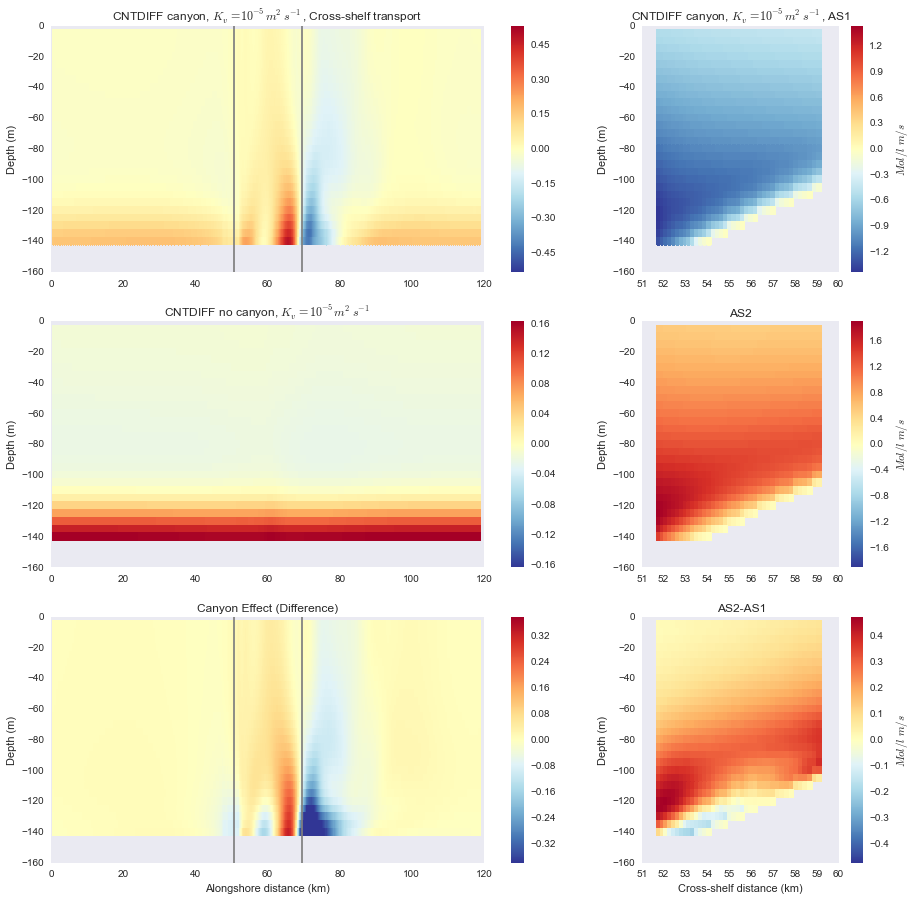

In [117]:
sns.set_palette( sns.hls_palette(11, l=.4, s=.8)) 
plt.clf()
fig45=plt.figure(figsize=(15,15))

tt = 6
ax1 = plt.subplot(3,3,(1,2))
plt.pcolor(xc[0,:-1]/1000,rc[0:29],SBcan[tt,:,:],cmap = 'RdYlBu_r',vmax = np.max(SBcan[tt,:,:]),
           vmin = -np.max(SBcan[tt,:,:]))
cb = plt.colorbar()
plt.axvline(x=xc[1,120]/1000.0,color='gray')
plt.axvline(x=xc[1,240]/1000.0,color='gray')
plt.ylabel('Depth (m) ')
plt.title('CNTDIFF canyon, $K_v = 10^{-5}m^2s^{-1}$, Cross-shelf transport')

ax4 = plt.subplot(3,3,3)
plt.pcolor(yc[227:267,0]/1000,rc[0:29],-U_AS1a[tt,:,:],cmap = 'RdYlBu_r',vmax = np.min(-U_AS1a[tt,:,:]),
           vmin = -np.min(-U_AS1a[tt,:,:]))
cb = plt.colorbar()
cb.set_label('$Mol/l$ $m/s$')
plt.ylabel('Depth (m) ')           
plt.title('CNTDIFF canyon, $K_v = 10^{-5}m^2s^{-1}$, AS1')

ax5 = plt.subplot(3,3,6)
plt.pcolor(yc[227:267,0]/1000,rc[0:29],U_AS2a[tt,:,:],cmap = 'RdYlBu_r',vmax = np.max(U_AS2a[tt,:,:]),
           vmin = -np.max(U_AS2a[tt,:,:]))
cb = plt.colorbar()
cb.set_label('$Mol/l$ $m/s$')
plt.ylabel('Depth (m) ')           
plt.title('AS2')

ax6 = plt.subplot(3,3,9)
plt.pcolor(yc[227:267,0]/1000,rc[0:29],U_AS2a[tt,:,:]-U_AS1a[tt,:,:],cmap = 'RdYlBu_r',
           vmax = np.max(U_AS2a[tt,:,:]-U_AS1a[tt,:,:]),vmin = -np.max(U_AS2a[tt,:,:]-U_AS1a[tt,:,:]))
cb = plt.colorbar()
cb.set_label('$Mol/l$ $m/s$')
plt.ylabel('Depth (m) ')           
plt.title('AS2-AS1')
plt.xlabel('Cross-shelf distance (km)')


ax2 = plt.subplot(3,3,(4,5))
plt.pcolor(xc[0,:-1]/1000,rc[0:29],SBnoc[tt,:,:],cmap = 'RdYlBu_r',vmax = np.max(SBnoc[tt,:,:]),
           vmin = -np.max(SBnoc[tt,:,:]))
cb=plt.colorbar()
plt.ylabel('Depth (m)')
plt.title('CNTDIFF no canyon, $K_v = 10^{-5}m^2s^{-1}$')

ax3 = plt.subplot(3,3,(7,8))
plt.pcolor(xc[0,:-1]/1000,rc[0:29],SBcan[tt,:,:]-SBnoc[tt,:,:],cmap = 'RdYlBu_r',
           vmax = np.max(SBcan[tt,:,:]-SBnoc[tt,:,:]),vmin = -np.max(SBcan[tt,:,:]-SBnoc[tt,:,:]))
cb=plt.colorbar()
plt.axvline(x=xc[1,120]/1000.0,color='gray')
plt.axvline(x=xc[1,240]/1000.0,color='gray')
plt.ylabel('Depth (m) ')
plt.xlabel('Alongshore distance (km)')
plt.title('Canyon Effect (Difference)')

#fig45.savefig('results/figures/CStransport/CSTransportALLplanesCNT_Tr1.eps', format='eps', dpi=1000, bbox_inches='tight')


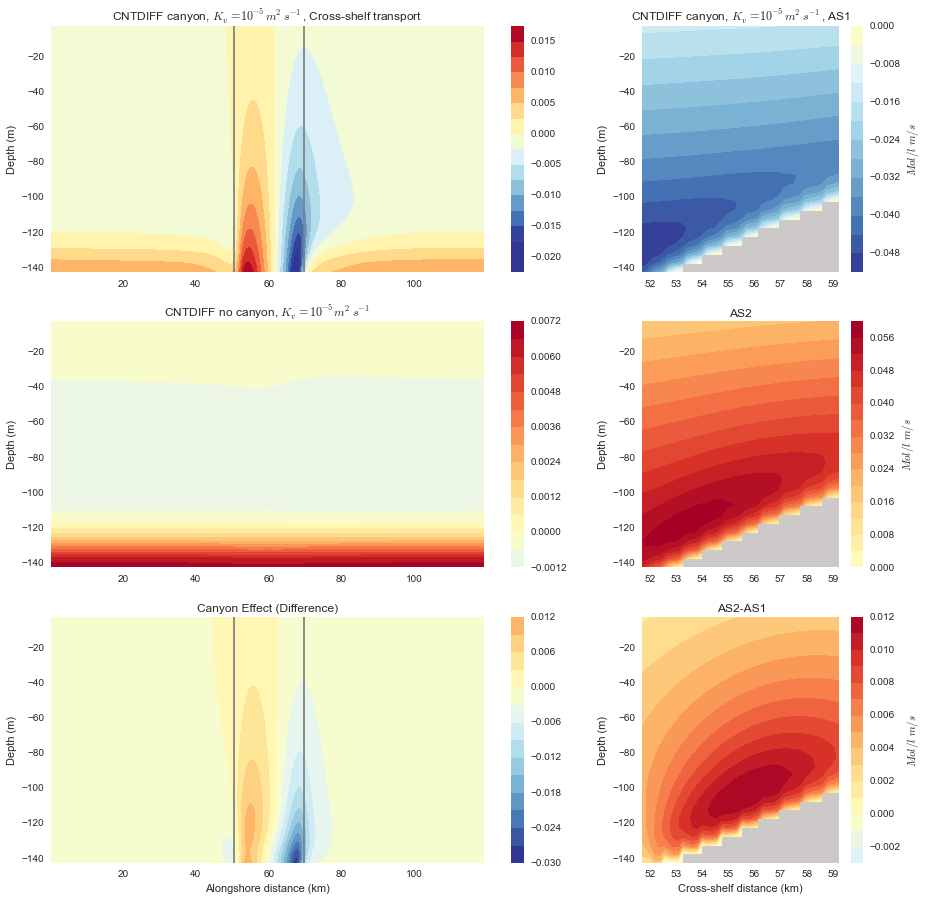

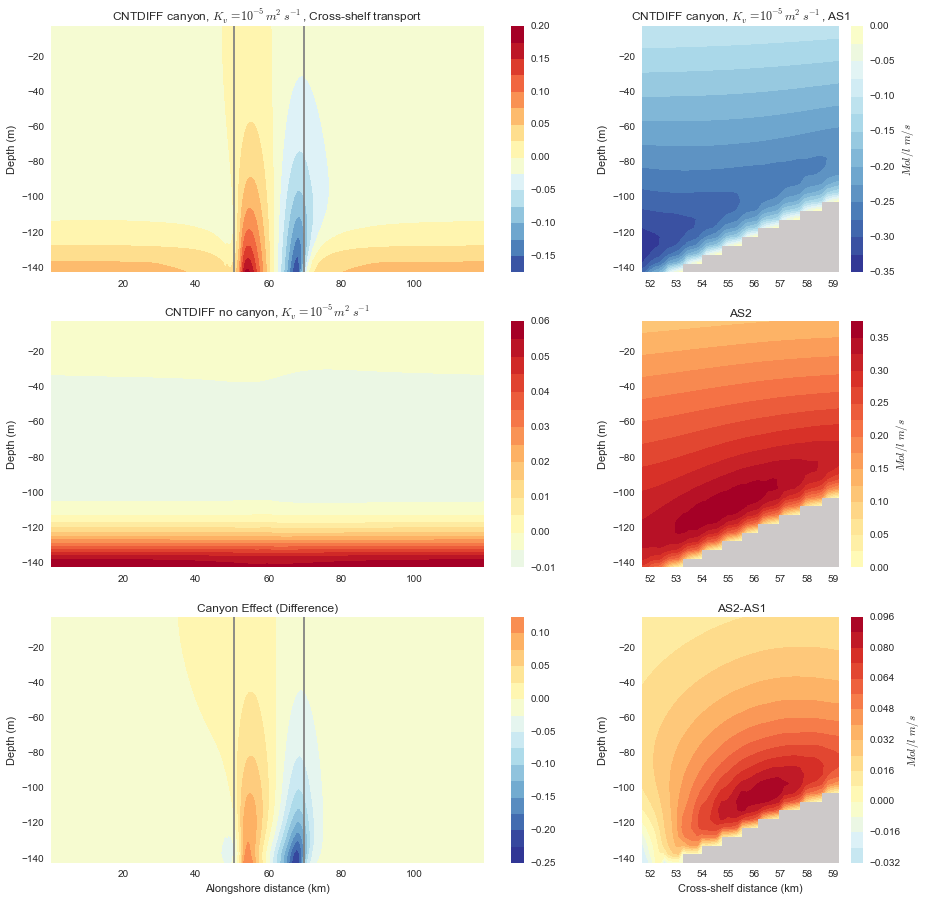

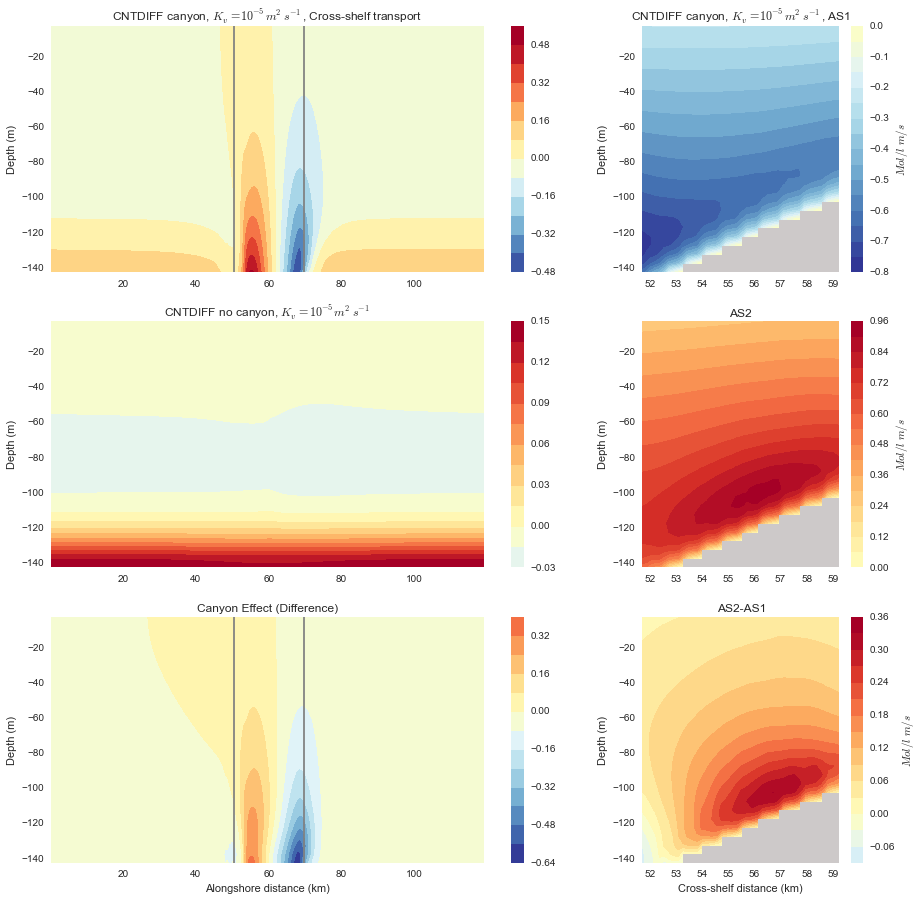

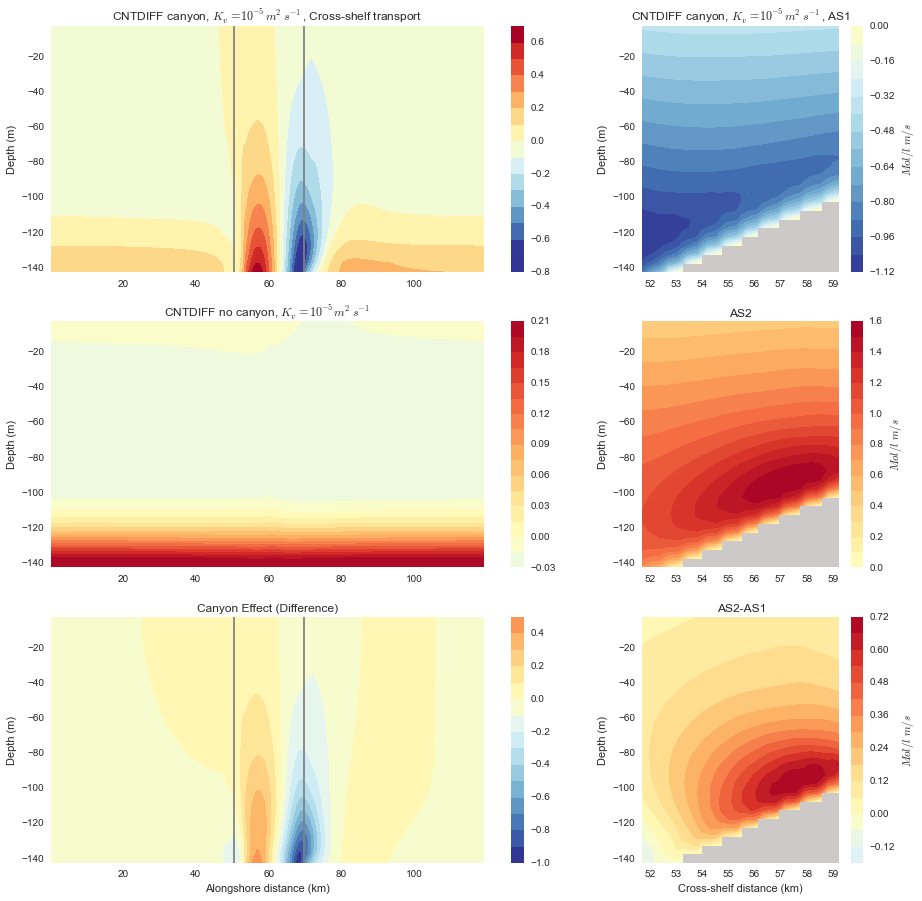

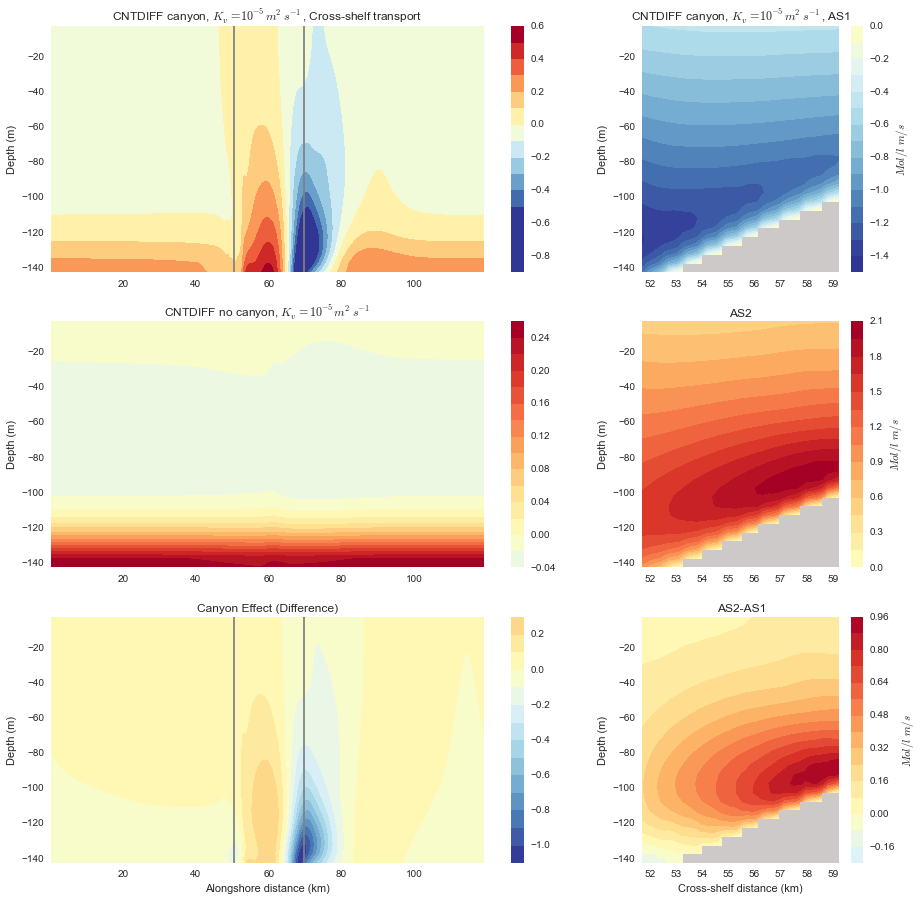

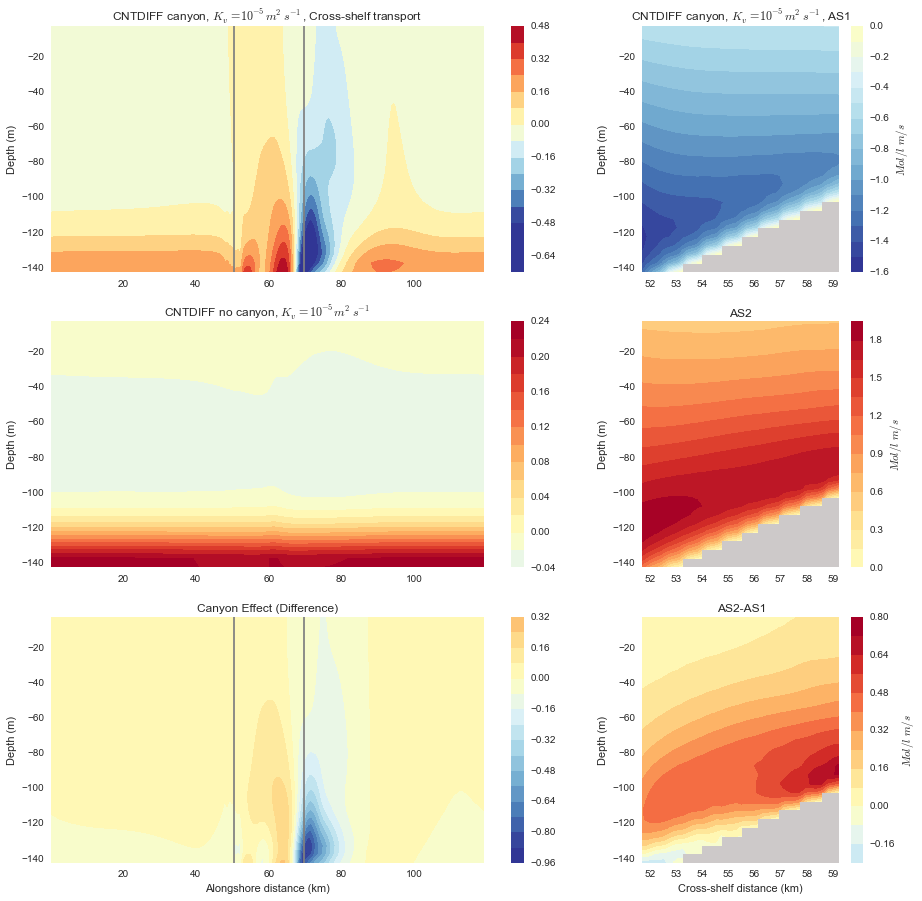

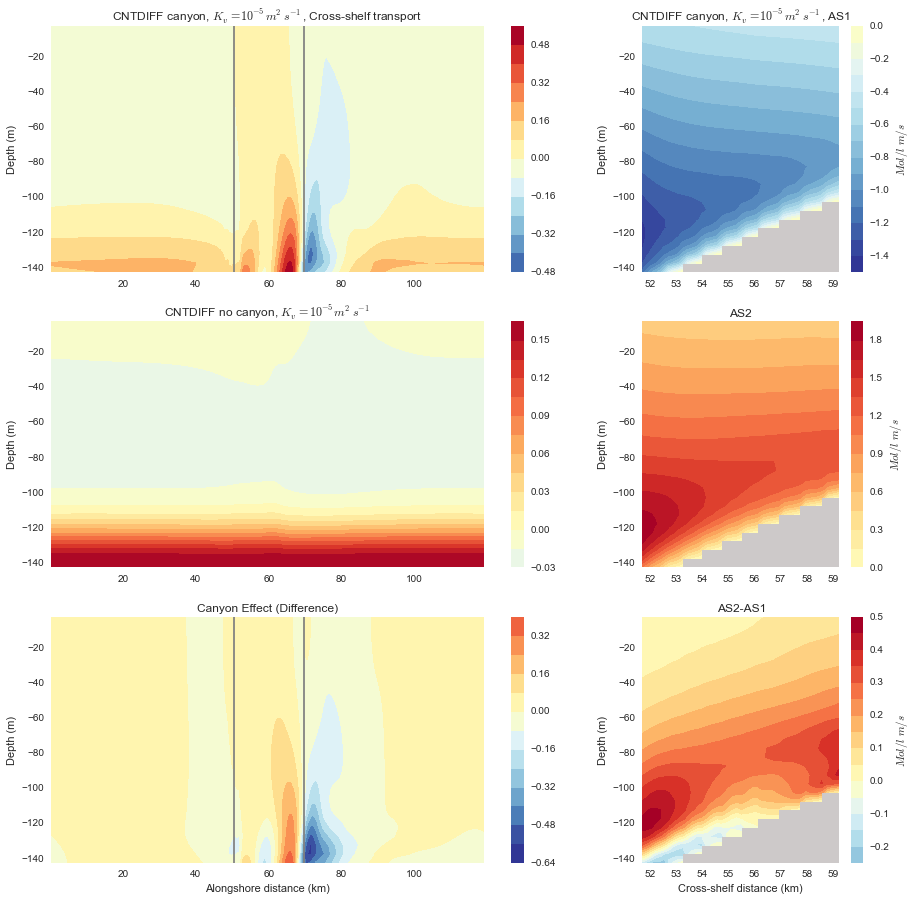

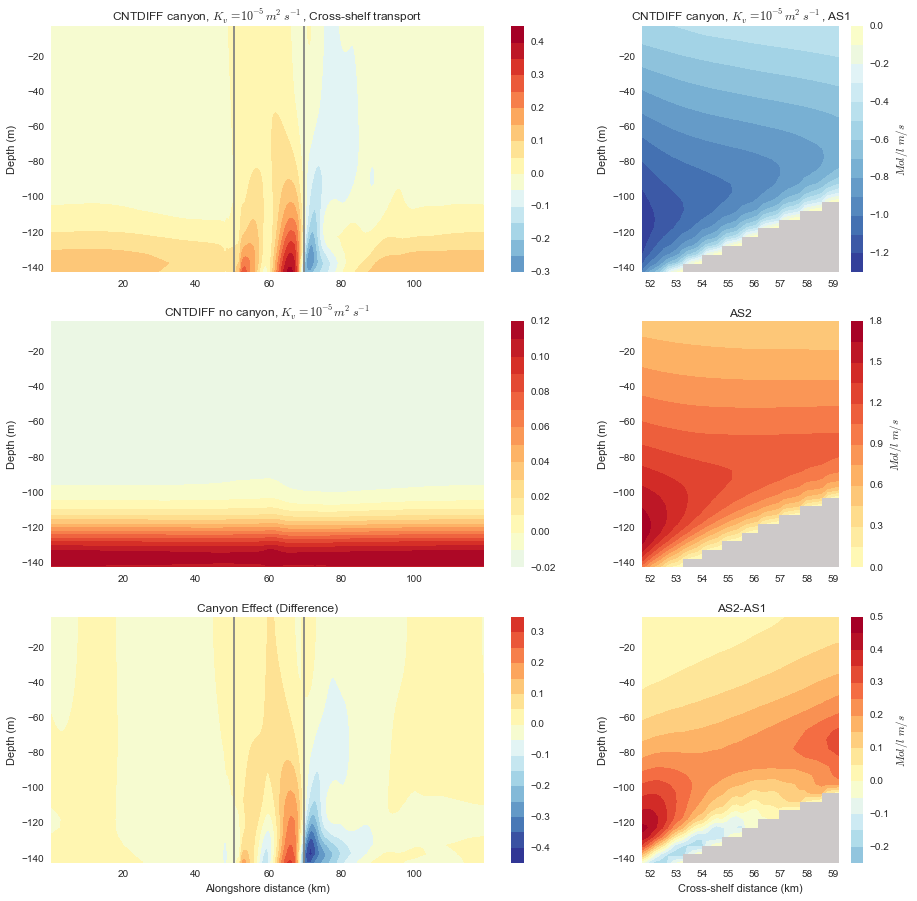

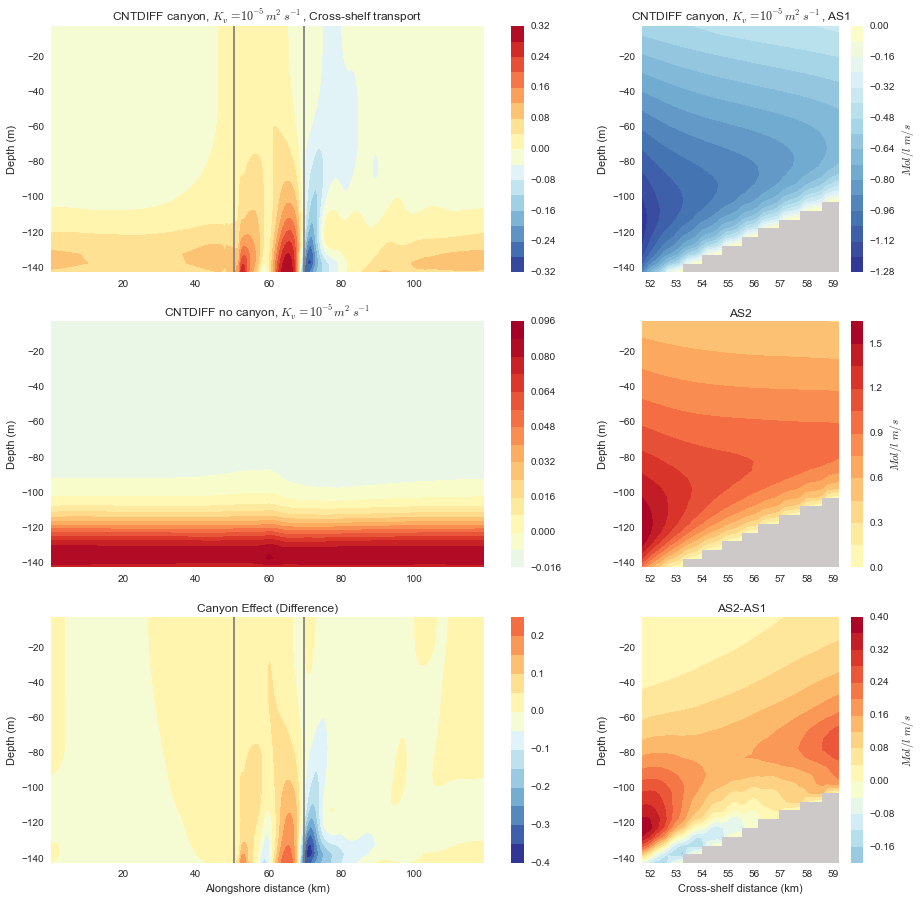

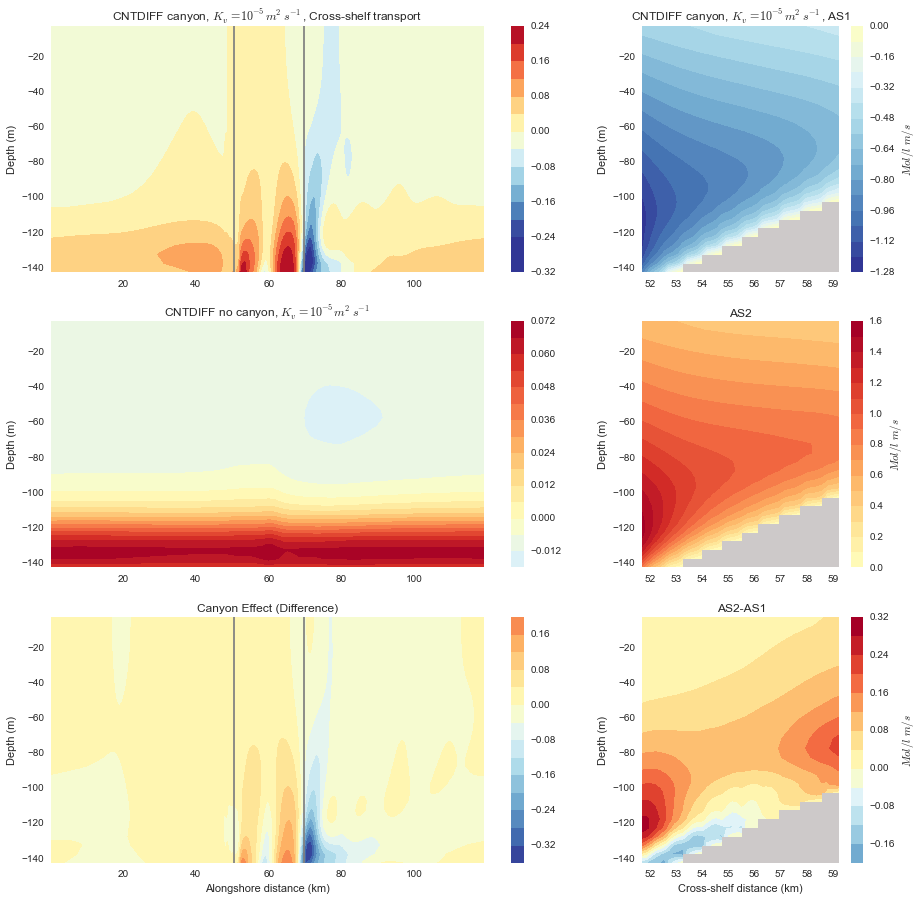

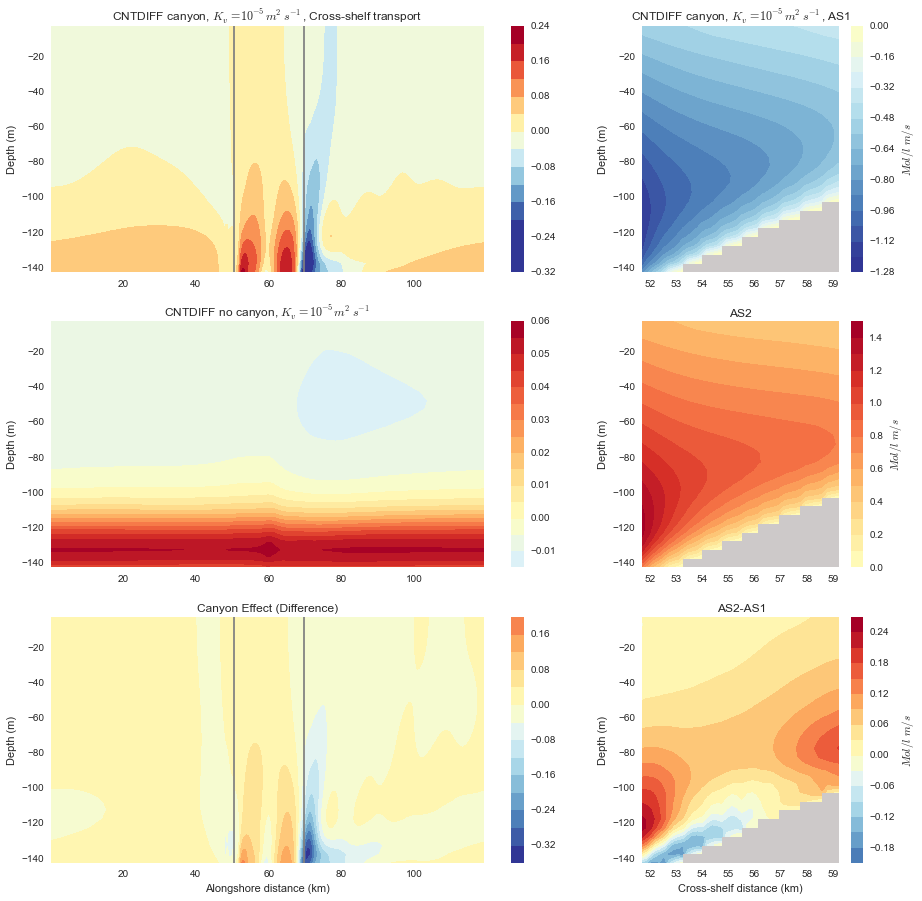

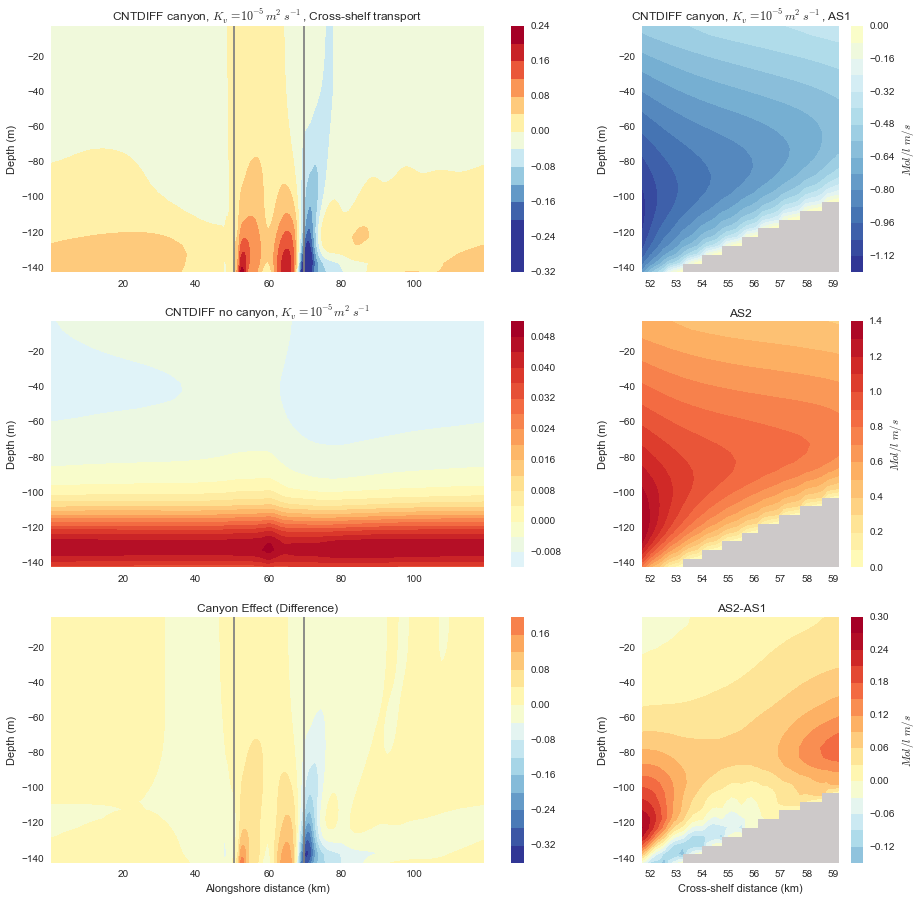

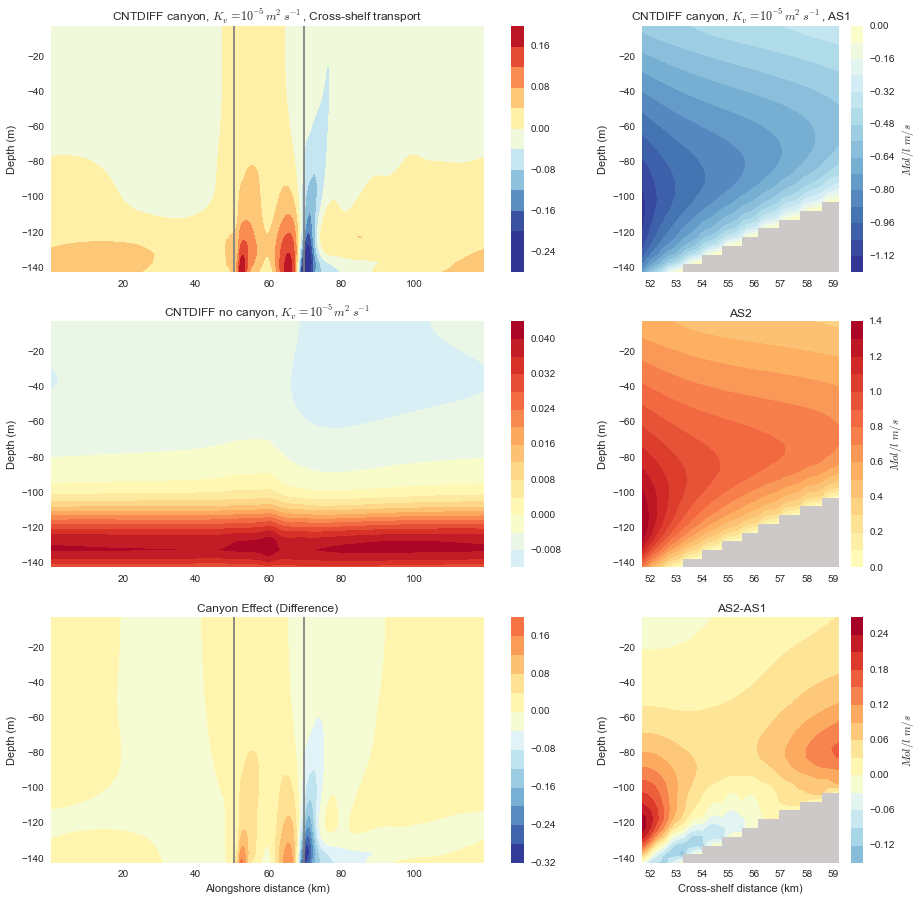

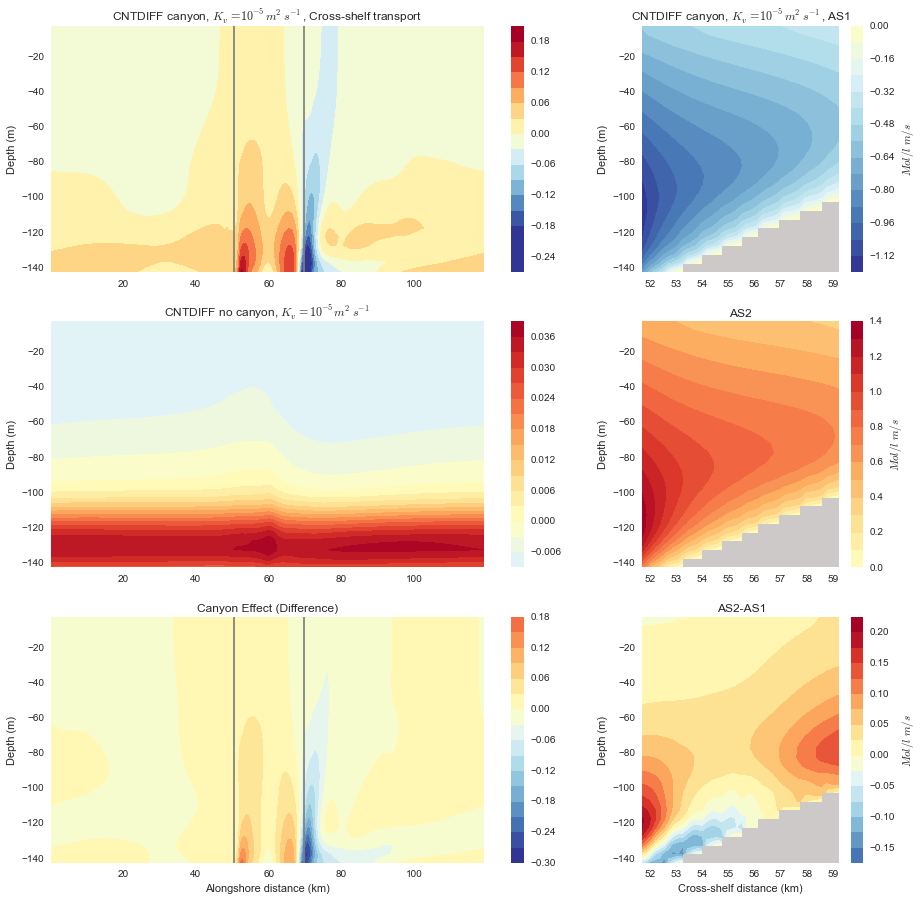

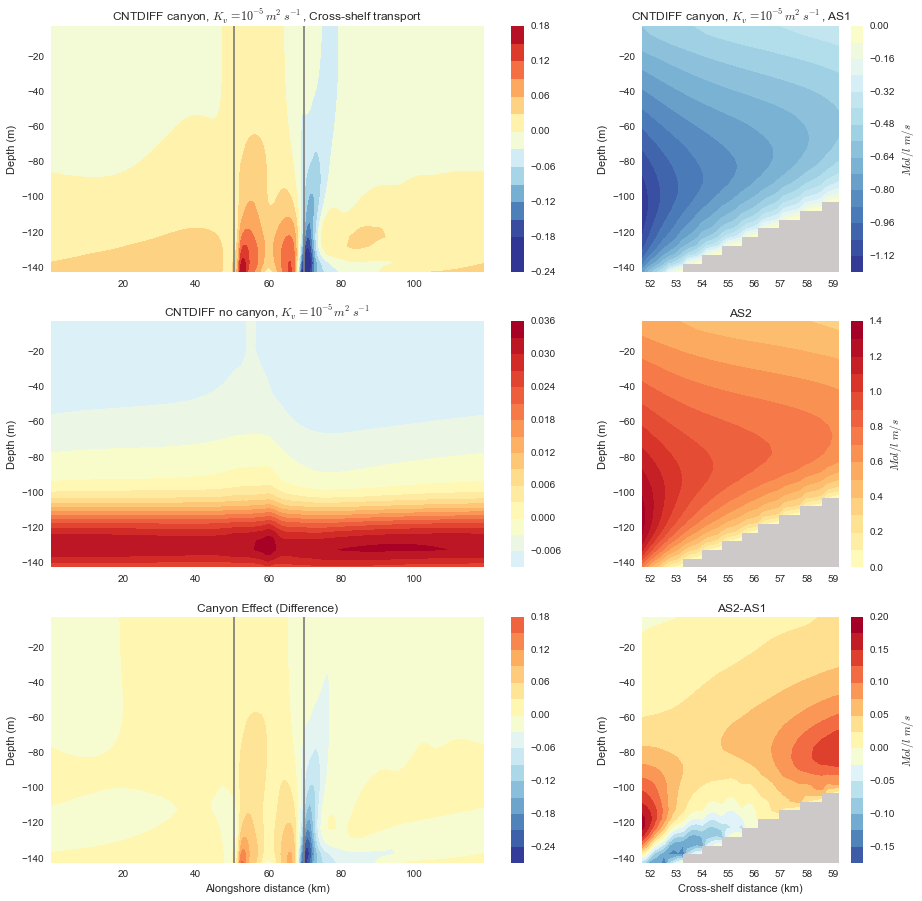

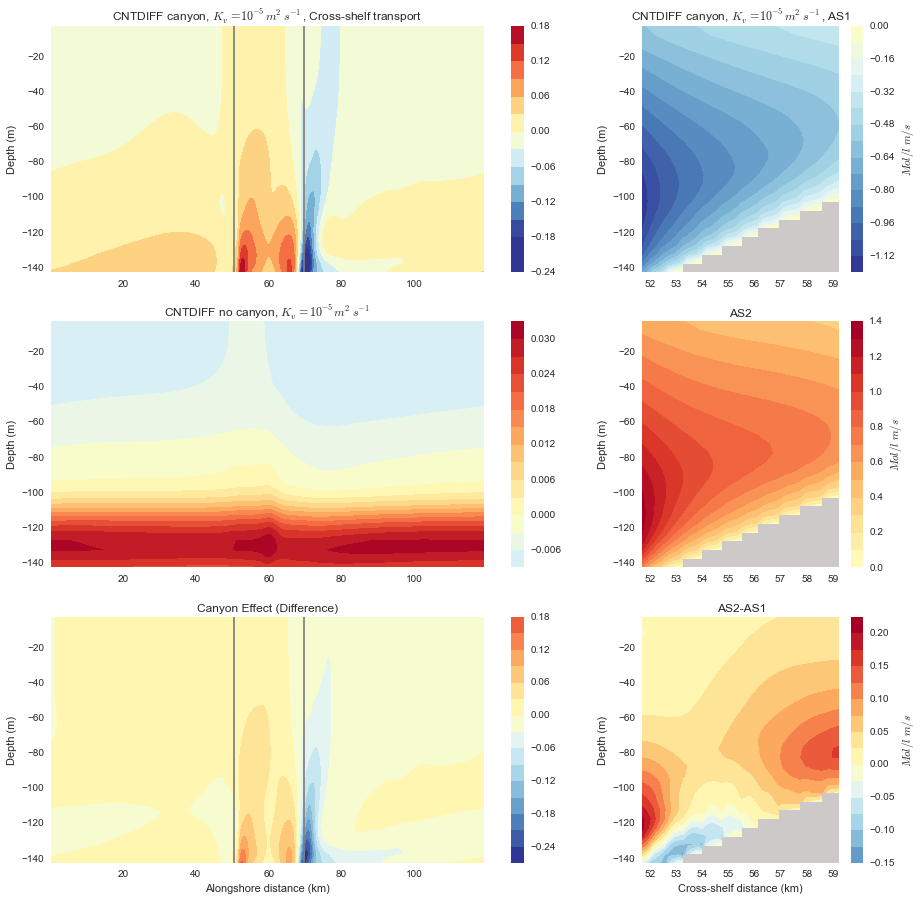

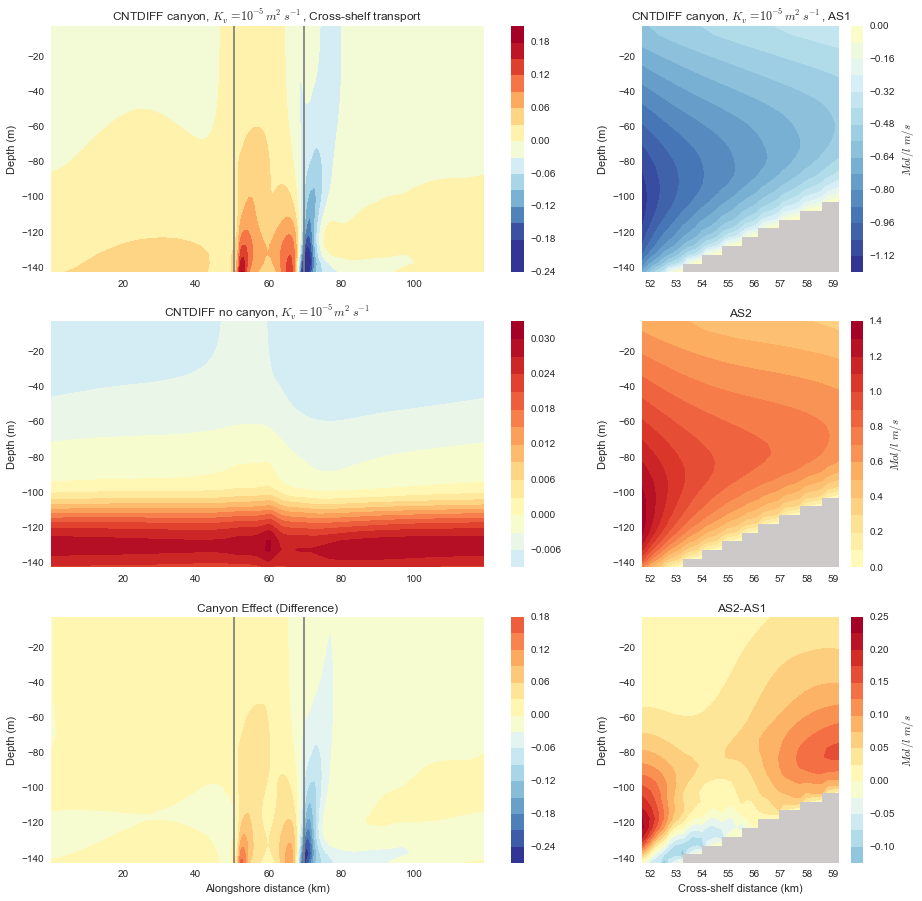

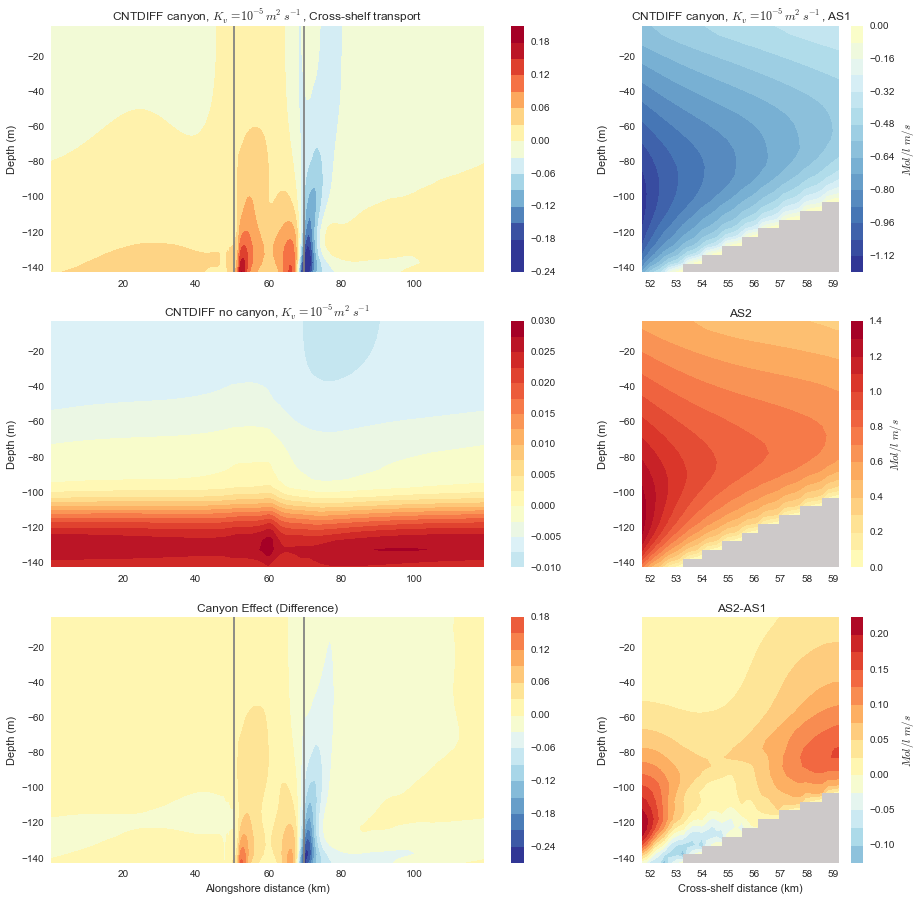

In [118]:
sns.set_palette( sns.hls_palette(11, l=.4, s=.8)) 
sns.set_style('dark')
sns.set_context('notebook')

for tt in range(18):
    fig45=plt.figure(figsize=(15,15))

    ax1 = plt.subplot(3,3,(1,2))
    plt.contourf(xc[0,:-1]/1000,rc[0:29],SBcan[tt,:,:],15,cmap = 'RdYlBu_r',vmax = np.max(SBcan[tt,:,:]),
               vmin = -np.max(SBcan[tt,:,:]))
    cb = plt.colorbar()
    plt.axvline(x=xc[1,120]/1000.0,color='gray')
    plt.axvline(x=xc[1,240]/1000.0,color='gray')
    plt.ylabel('Depth (m) ')
    plt.title('CNTDIFF canyon, $K_v = 10^{-5}m^2s^{-1}$, Cross-shelf transport')

    ax4 = plt.subplot(3,3,3)
    ax4.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    plt.contourf(yc[227:267,0]/1000,rc[0:29],-U_AS1a[tt,:,:],15,cmap = 'RdYlBu_r',vmax = -np.min(-U_AS1a[tt,:,:]),
               vmin = np.min(-U_AS1a[tt,:,:]))
    cb = plt.colorbar()
    cb.set_label('$Mol/l$ $m/s$')
    plt.ylabel('Depth (m) ')           
    plt.title('CNTDIFF canyon, $K_v = 10^{-5}m^2s^{-1}$, AS1')

    ax5 = plt.subplot(3,3,6)
    ax5.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    plt.contourf(yc[227:267,0]/1000,rc[0:29],U_AS2a[tt,:,:],15,cmap = 'RdYlBu_r',vmax = np.max(U_AS2a[tt,:,:]),
               vmin = -np.max(U_AS2a[tt,:,:]))
    cb = plt.colorbar()
    cb.set_label('$Mol/l$ $m/s$')
    plt.ylabel('Depth (m) ')           
    plt.title('AS2')

    ax6 = plt.subplot(3,3,9)
    ax6.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    plt.contourf(yc[227:267,0]/1000,rc[0:29],U_AS2a[tt,:,:]-U_AS1a[tt,:,:],15,cmap = 'RdYlBu_r',
               vmax = np.max(U_AS2a[tt,:,:]-U_AS1a[tt,:,:]),vmin = -np.max(U_AS2a[tt,:,:]-U_AS1a[tt,:,:]))
    cb = plt.colorbar()
    cb.set_label('$Mol/l$ $m/s$')
    plt.ylabel('Depth (m) ')           
    plt.title('AS2-AS1')
    plt.xlabel('Cross-shelf distance (km)')


    ax2 = plt.subplot(3,3,(4,5))
    plt.contourf(xc[0,:-1]/1000,rc[0:29],SBnoc[tt,:,:],15,cmap = 'RdYlBu_r',vmax = np.max(SBnoc[tt,:,:]),
               vmin = -np.max(SBnoc[tt,:,:]))
    cb=plt.colorbar()
    plt.ylabel('Depth (m)')
    plt.title('CNTDIFF no canyon, $K_v = 10^{-5}m^2s^{-1}$')

    ax3 = plt.subplot(3,3,(7,8))
    plt.contourf(xc[0,:-1]/1000,rc[0:29],SBcan[tt,:,:]-SBnoc[tt,:,:],15,cmap = 'RdYlBu_r',
               vmax = -np.min(SBcan[tt,:,:]-SBnoc[tt,:,:]),vmin = np.min(SBcan[tt,:,:]-SBnoc[tt,:,:]))
    cb=plt.colorbar()
    plt.axvline(x=xc[1,120]/1000.0,color='gray')
    plt.axvline(x=xc[1,240]/1000.0,color='gray')
    plt.ylabel('Depth (m) ')
    plt.xlabel('Alongshore distance (km)')
    plt.title('Canyon Effect (Difference)')

    figname = ('results/figures/CStransport/CSTransportContoursCNT_Tr1_t%d.eps' %tt)
    plt.show()
    #fig45.savefig(figname, format='eps', dpi=1000, bbox_inches='tight')
    plt.clf()
    
